In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
print("imports done!")

imports done!


In [2]:
train = pd.read_csv(r"C:\Users\vedan\Downloads\train(3).csv")
test = pd.read_csv(r"C:\Users\vedan\Downloads\test(3).csv")
train.head()

test.set_index('id',inplace = True)
train.set_index('id',inplace = True)

In [3]:
train.describe()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
count,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000
mean,179.948402,1013.602146,26.365799,23.953059,22.170091,20.454566,82.036530,75.721918,3.744429,104.863151,21.804703,0.753425
std,105.203592,5.655366,5.654330,5.222410,5.059120,5.288406,7.800654,18.026498,3.626327,80.002416,9.898659,0.431116
min,1.000000,999.000000,10.400000,7.400000,4.000000,-0.300000,39.000000,2.000000,0.000000,10.000000,4.400000,0.000000
25%,89.000000,1008.600000,21.300000,19.300000,17.700000,16.800000,77.000000,69.000000,0.400000,40.000000,14.125000,1.000000
50%,178.500000,1013.000000,27.800000,25.500000,23.850000,22.150000,82.000000,83.000000,2.400000,70.000000,20.500000,1.000000
75%,270.000000,1017.775000,31.200000,28.400000,26.400000,25.000000,88.000000,88.000000,6.800000,200.000000,27.900000,1.000000
max,365.000000,1034.600000,36.000000,31.500000,29.800000,26.700000,98.000000,100.000000,12.100000,300.000000,59.500000,1.000000


damn. no missing data

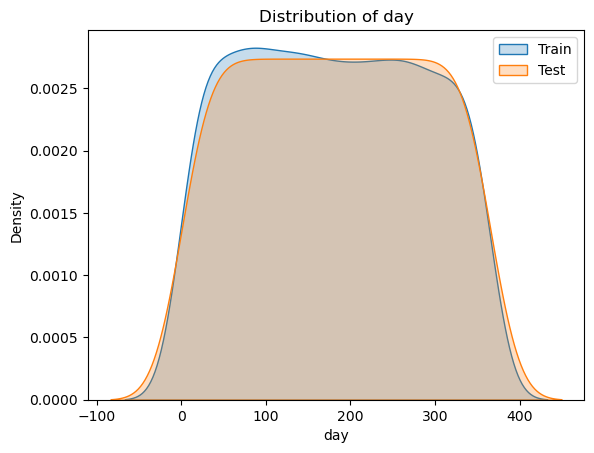

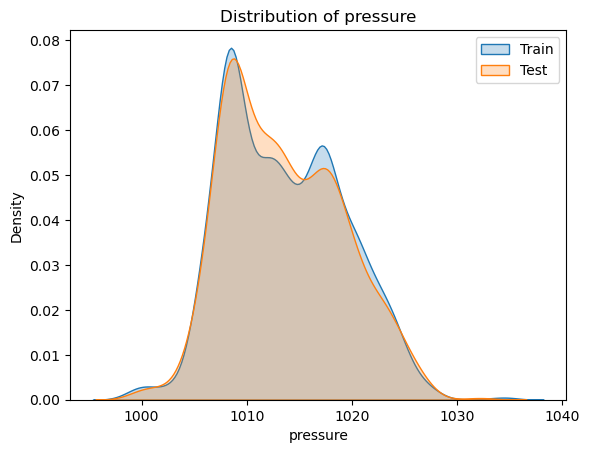

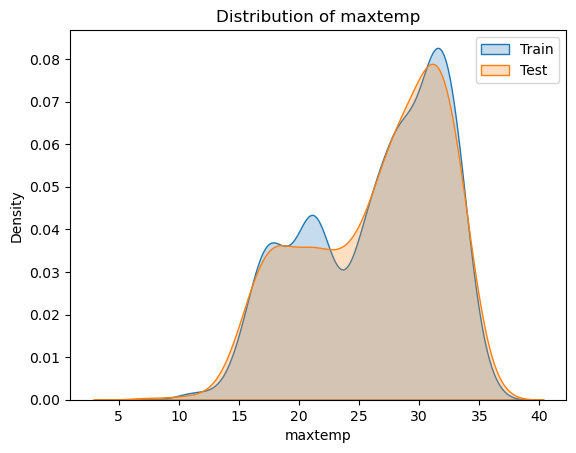

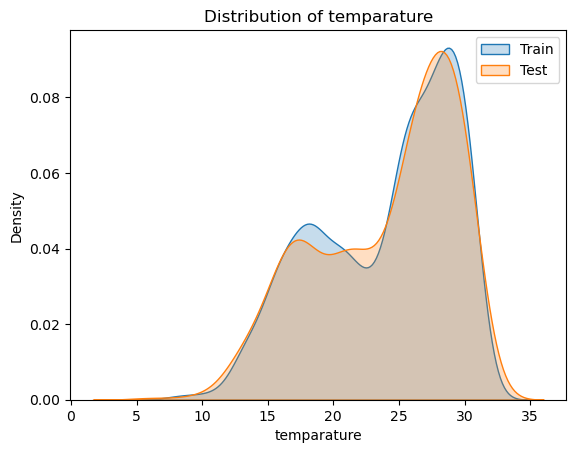

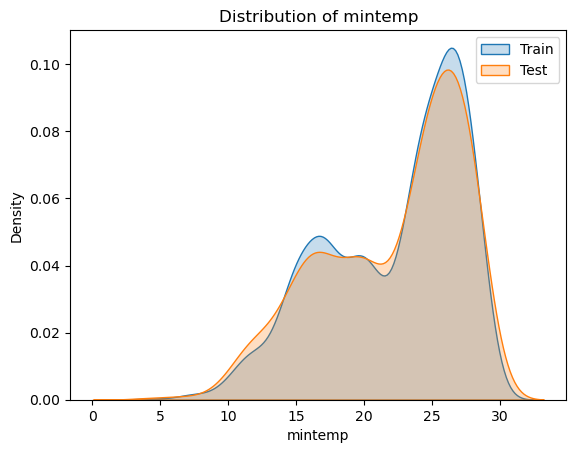

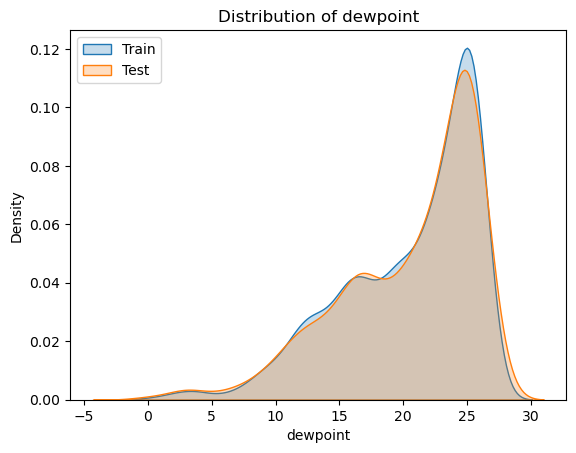

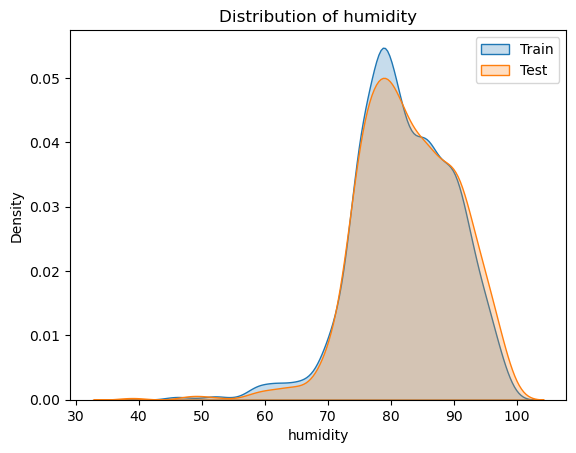

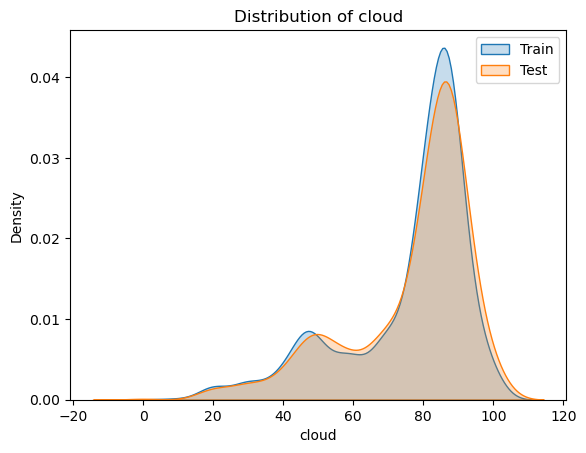

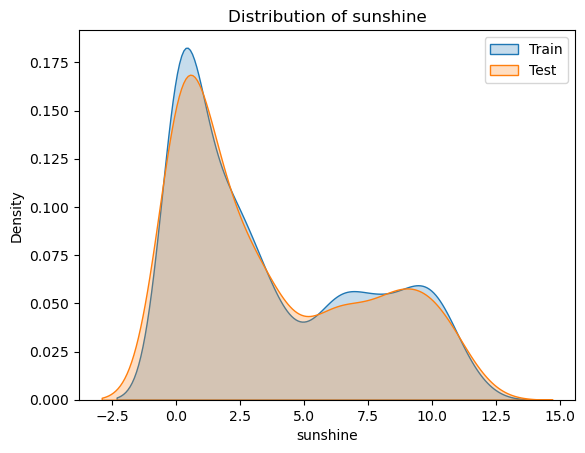

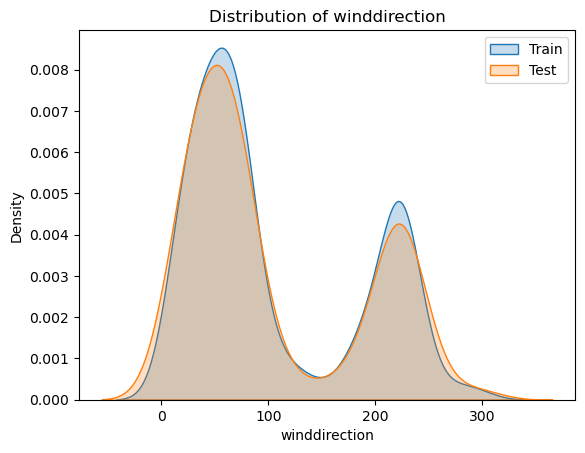

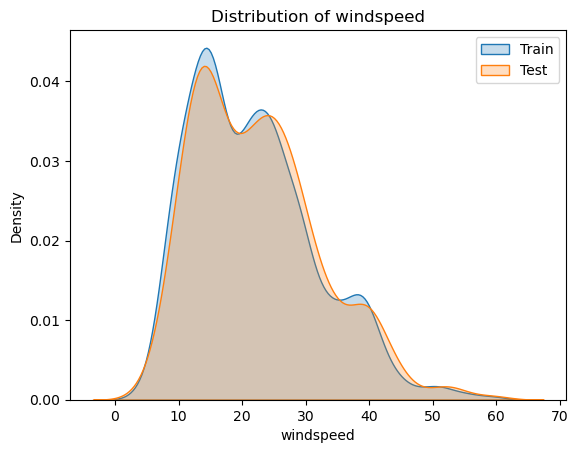

In [4]:

for col in test.columns:
    sns.kdeplot(train[col], label='Train', fill=True)
    sns.kdeplot(test[col], label='Test', fill=True)
    plt.title(f"Distribution of {col}")
    plt.legend()
    plt.show()


Text(0, 0.5, 'rain?')

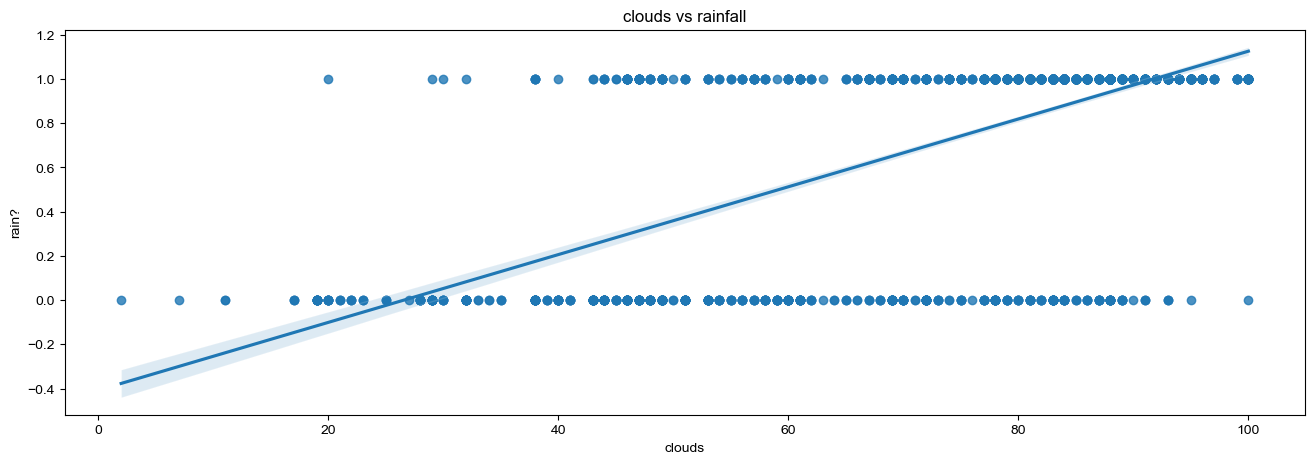

In [5]:
plt.figure(figsize=(16,5))
sns.regplot(x='cloud',y='rainfall',data=train)
sns.set_style('dark')
plt.title('clouds vs rainfall')
plt.xlabel('clouds')
plt.ylabel('rain?')

Text(0, 0.5, 'rain?')

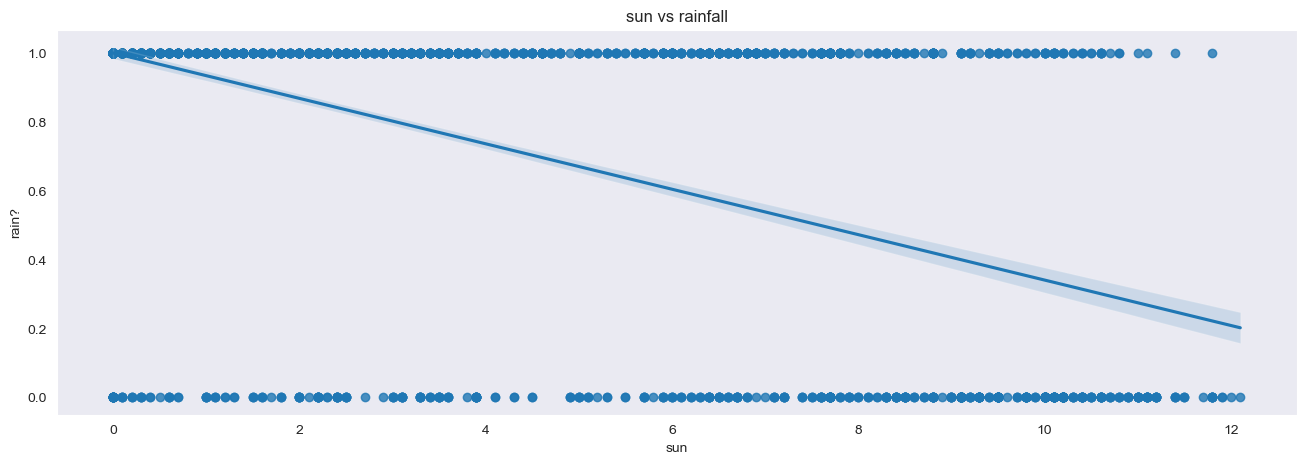

In [6]:
plt.figure(figsize=(16,5))
sns.regplot(x='sunshine',y='rainfall',data=train)
sns.set_style('dark')
plt.title('sun vs rainfall')
plt.xlabel('sun')
plt.ylabel('rain?')

i suspect sun and clouds are correlated.

Text(0, 0.5, 'sun')

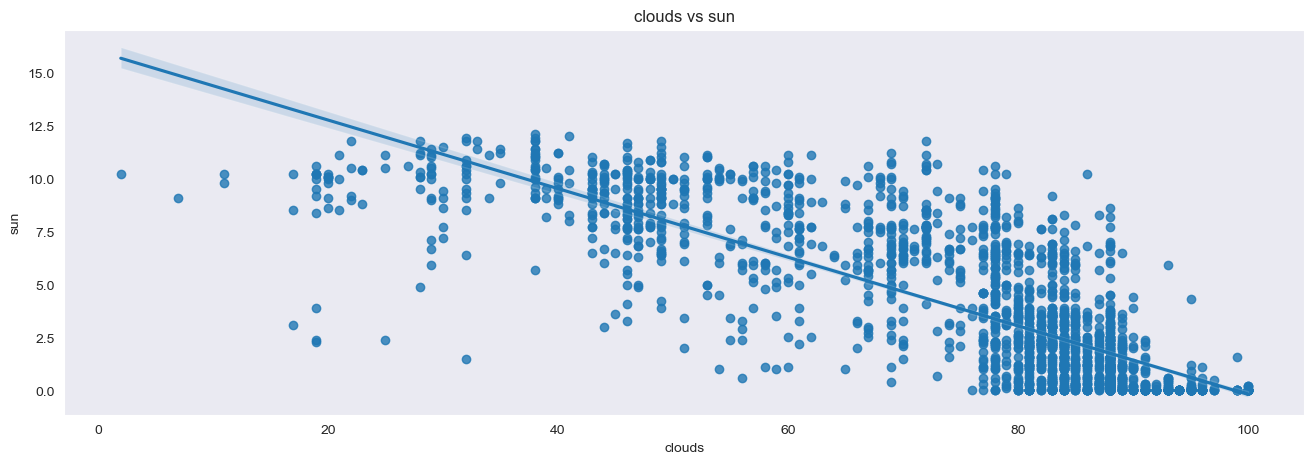

In [7]:
plt.figure(figsize=(16,5))
sns.regplot(x='cloud',y='sunshine',data=train)
sns.set_style('dark')
plt.title('clouds vs sun')
plt.xlabel('clouds')
plt.ylabel('sun')

yes they are

Text(0, 0.5, 'humidity')

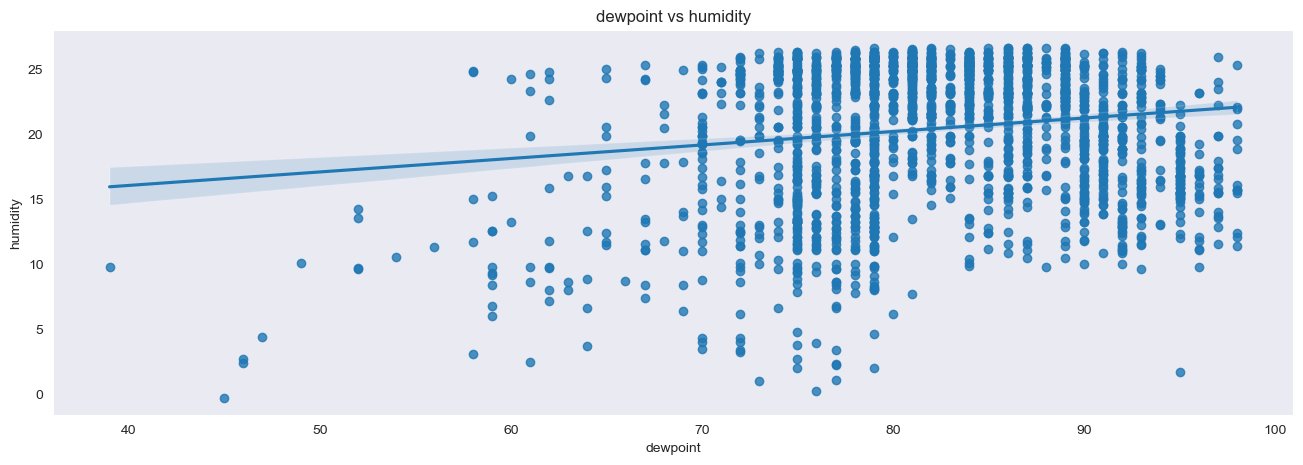

In [8]:
plt.figure(figsize=(16,5))
sns.regplot(x='humidity',y='dewpoint',data=train)
sns.set_style('dark')
plt.title('dewpoint vs humidity')
plt.xlabel('dewpoint')
plt.ylabel('humidity')

Text(0, 0.5, 'rain')

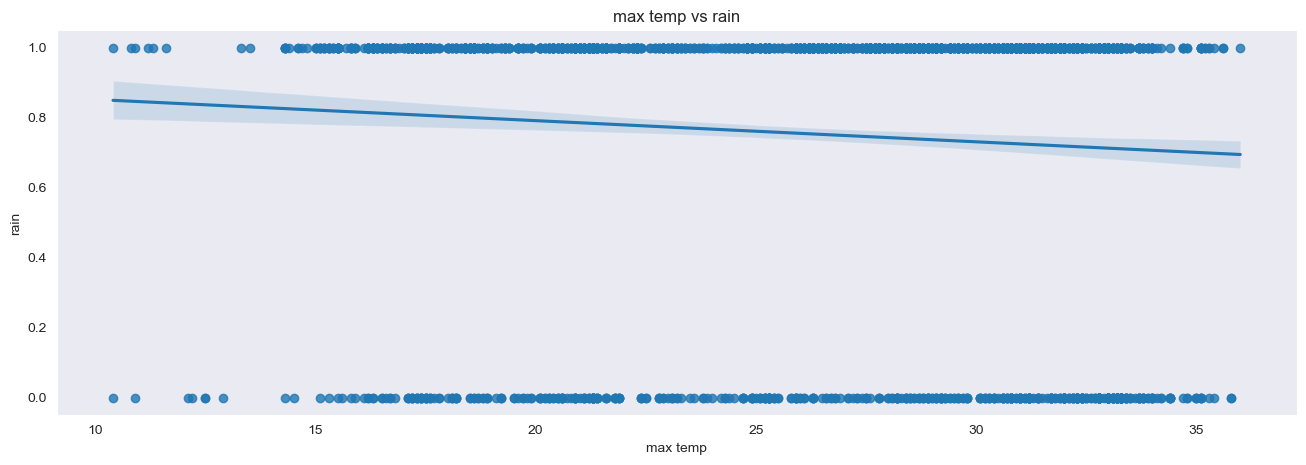

In [9]:
plt.figure(figsize=(16,5))
sns.regplot(x='maxtemp',y='rainfall',data=train)
sns.set_style('dark')
plt.title('max temp vs rain')
plt.xlabel('max temp')
plt.ylabel('rain')

Text(0, 0.5, 'rai,')

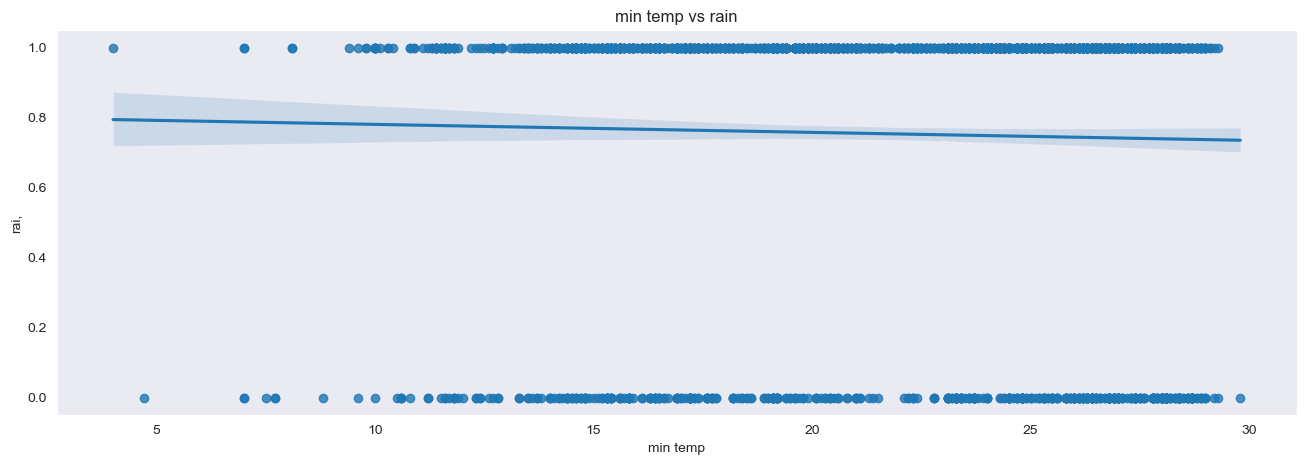

In [10]:
plt.figure(figsize=(16,5))
sns.regplot(x='mintemp',y='rainfall',data=train)
sns.set_style('dark')
plt.title('min temp vs rain')
plt.xlabel('min temp')
plt.ylabel('rai,')

Text(0, 0.5, 'rain')

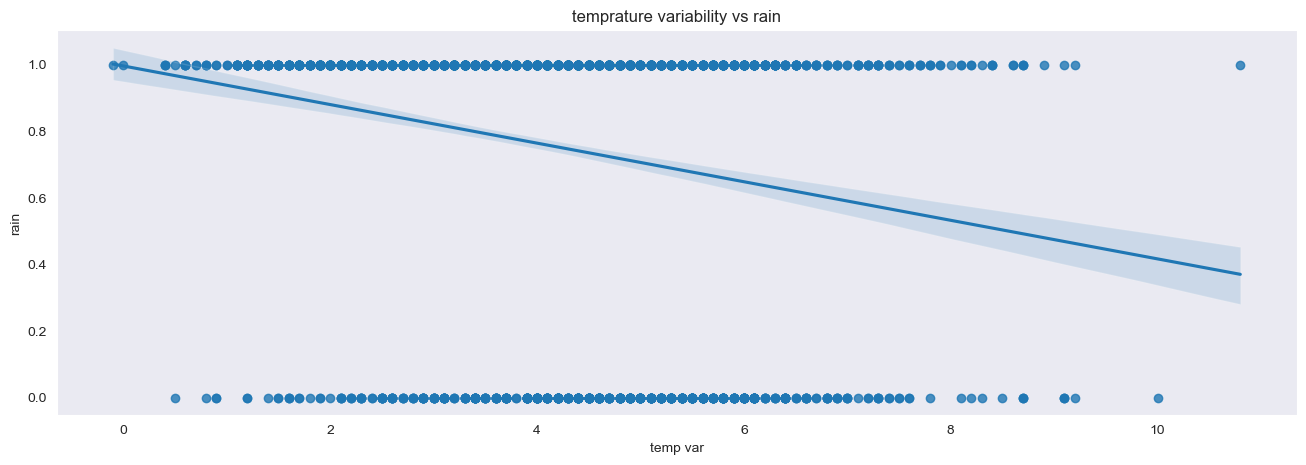

In [11]:
train['Temp_var'] = train['maxtemp']-train['mintemp']
plt.figure(figsize=(16,5))
sns.regplot(x='Temp_var',y='rainfall',data=train)
sns.set_style('dark')
plt.title('temprature variability vs rain')
plt.xlabel('temp var')
plt.ylabel('rain')

In [12]:
test['Temp_var'] = test['maxtemp']-test['mintemp']

Text(0, 0.5, 'rain')

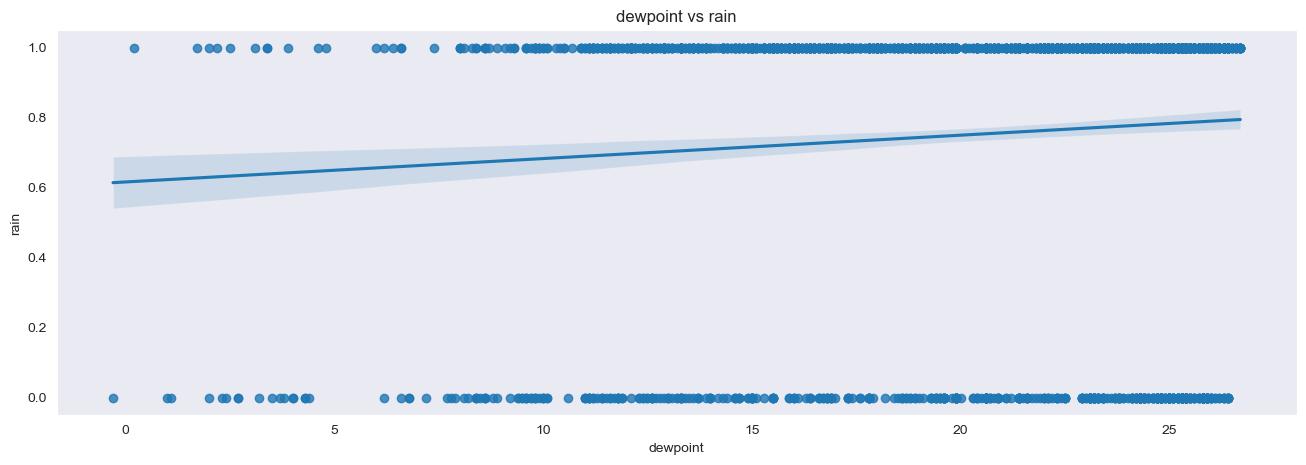

In [13]:
plt.figure(figsize=(16,5))
sns.regplot(x='dewpoint',y='rainfall',data=train)
sns.set_style('dark')
plt.title('dewpoint vs rain')
plt.xlabel('dewpoint')
plt.ylabel('rain')

Text(0, 0.5, 'rain')

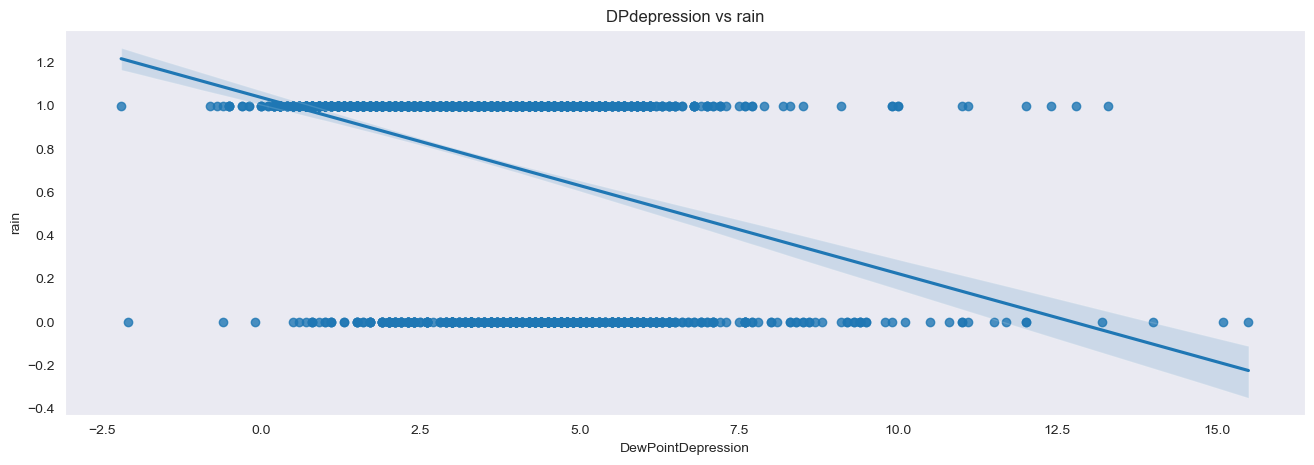

In [14]:
train['DPdepression'] = train['temparature'] - train['dewpoint']
plt.figure(figsize=(16,5))
sns.regplot(x='DPdepression',y='rainfall',data=train)
sns.set_style('dark')
plt.title('DPdepression vs rain')
plt.xlabel('DewPointDepression')
plt.ylabel('rain')

In [15]:
test['DPdepression'] = test['temparature'] - test['dewpoint']

Text(0, 0.5, 'rain')

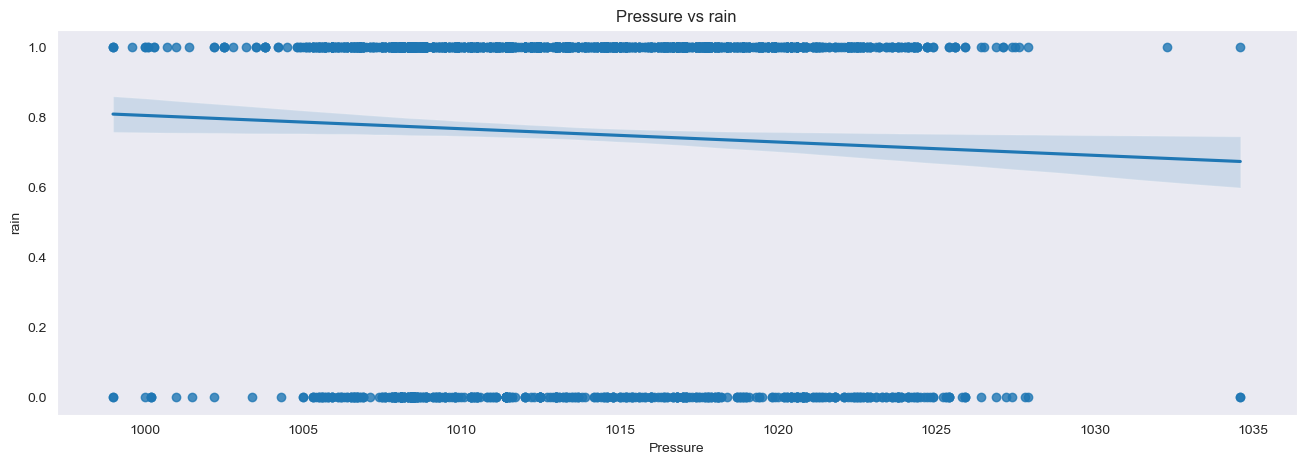

In [16]:
plt.figure(figsize=(16,5))
sns.regplot(x='pressure',y='rainfall',data=train)
sns.set_style('dark')
plt.title('Pressure vs rain')
plt.xlabel('Pressure')
plt.ylabel('rain')

Text(0, 0.5, 'rain')

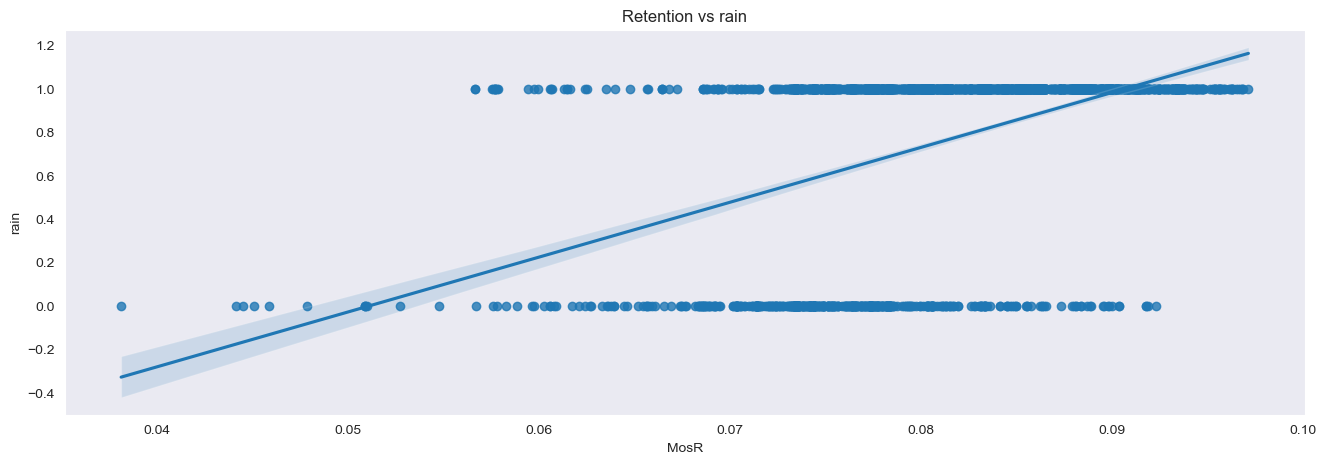

In [17]:
train['moisture_retention'] = train['humidity']/train['pressure']
plt.figure(figsize=(16,5))
sns.regplot(x='moisture_retention',y='rainfall',data=train)
sns.set_style('dark')
plt.title('Retention vs rain')
plt.xlabel('MosR')
plt.ylabel('rain')

In [18]:
test['moisture_retention'] = test['humidity']/test['pressure']

In [19]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
train[['NormCloudCover', 'NormWindSpeed']] = scaler.fit_transform(train[['cloud', 'windspeed']])
train['CloudPersistenceIndex'] = train['NormCloudCover'] * (1 - train['NormWindSpeed'])

Text(0, 0.5, 'rain')

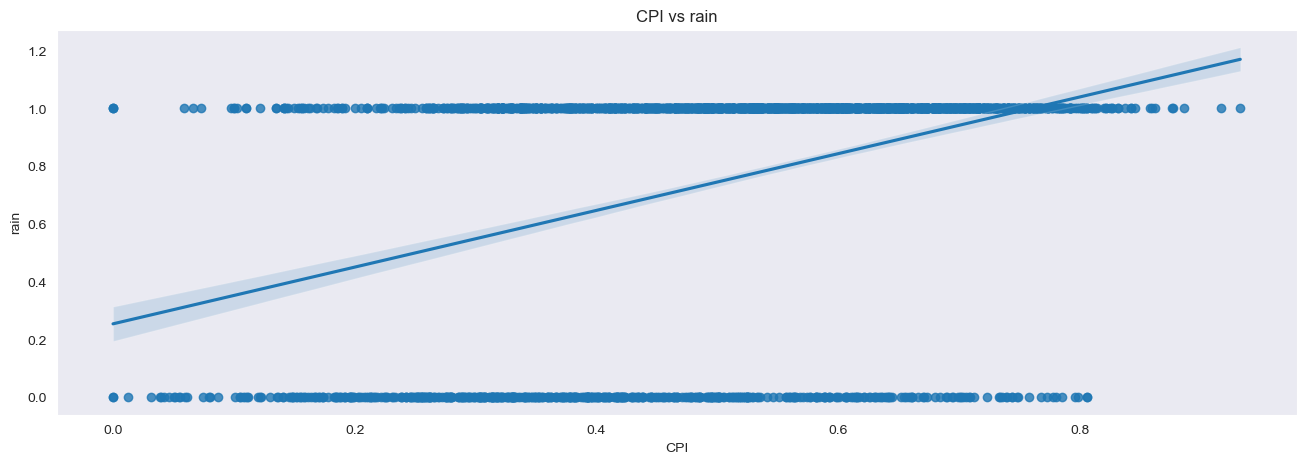

In [20]:
plt.figure(figsize=(16,5))
sns.regplot(x='CloudPersistenceIndex',y='rainfall',data=train)
sns.set_style('dark')
plt.title('CPI vs rain')
plt.xlabel('CPI')
plt.ylabel('rain')

In [21]:
test[['NormCloudCover', 'NormWindSpeed']] = scaler.transform(test[['cloud', 'windspeed']])
test['CloudPersistenceIndex'] = test['NormCloudCover'] * (1 - test['NormWindSpeed'])

In [22]:

train['NormSunlight'] = scaler.fit_transform(train[['sunshine']])
train['EffectiveSunlight'] = train['NormSunlight'] * (1 - train['NormCloudCover'])

Text(0, 0.5, 'rain')

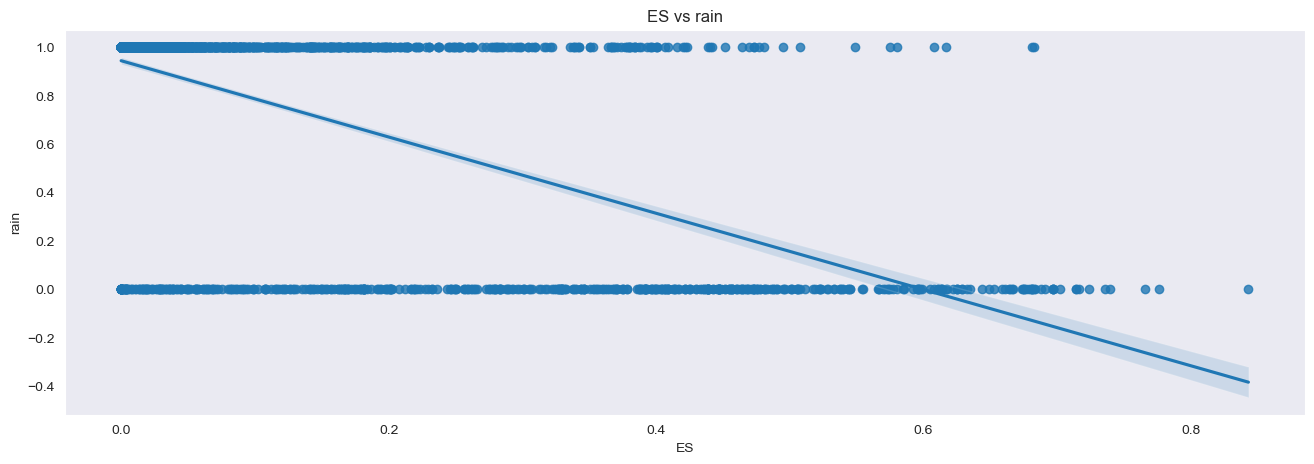

In [23]:
plt.figure(figsize=(16,5))
sns.regplot(x='EffectiveSunlight',y='rainfall',data=train)
sns.set_style('dark')
plt.title('ES vs rain')
plt.xlabel('ES')
plt.ylabel('rain')

In [24]:
test['NormSunlight'] = scaler.transform(test[['sunshine']])
test['EffectiveSunlight'] = test['NormSunlight'] * (1 - test['NormCloudCover'])

In [25]:
train.columns

Index(['day', 'pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity', 'cloud', 'sunshine', 'winddirection', 'windspeed',
       'rainfall', 'Temp_var', 'DPdepression', 'moisture_retention',
       'NormCloudCover', 'NormWindSpeed', 'CloudPersistenceIndex',
       'NormSunlight', 'EffectiveSunlight'],
      dtype='object')

Text(0, 0.5, 'rain')

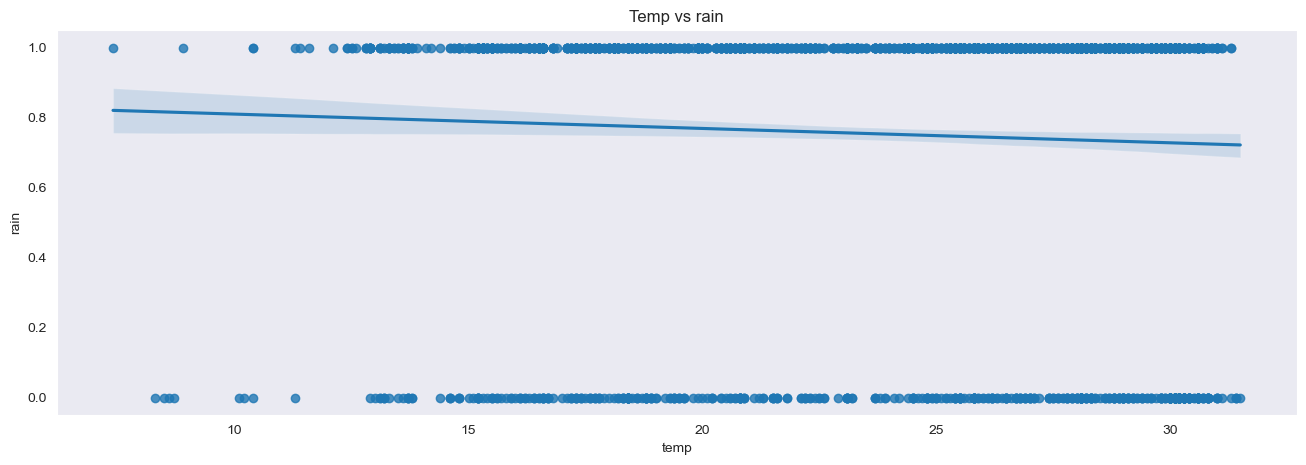

In [26]:
plt.figure(figsize=(16,5))
sns.regplot(x='temparature',y='rainfall',data=train)
sns.set_style('dark')
plt.title('Temp vs rain')
plt.xlabel('temp')
plt.ylabel('rain')

Text(0, 0.5, 'rain')

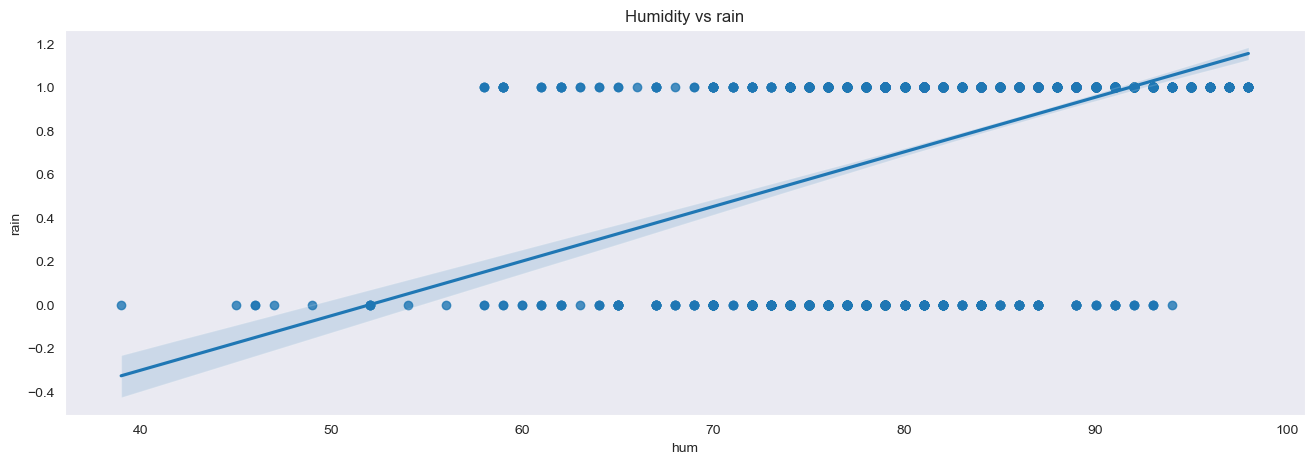

In [27]:
plt.figure(figsize=(16,5))
sns.regplot(x='humidity',y='rainfall',data=train)
sns.set_style('dark')
plt.title('Humidity vs rain')
plt.xlabel('hum')
plt.ylabel('rain')

Text(0, 0.5, 'rain')

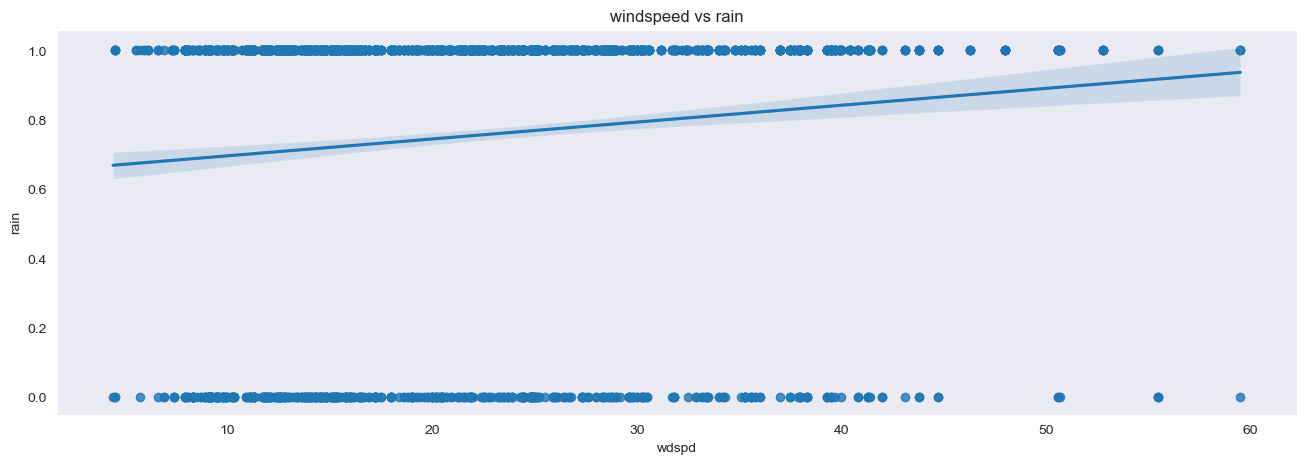

In [28]:
plt.figure(figsize=(16,5))
sns.regplot(x='windspeed',y='rainfall',data=train)
sns.set_style('dark')
plt.title('windspeed vs rain')
plt.xlabel('wdspd')
plt.ylabel('rain')

Text(0, 0.5, 'rain')

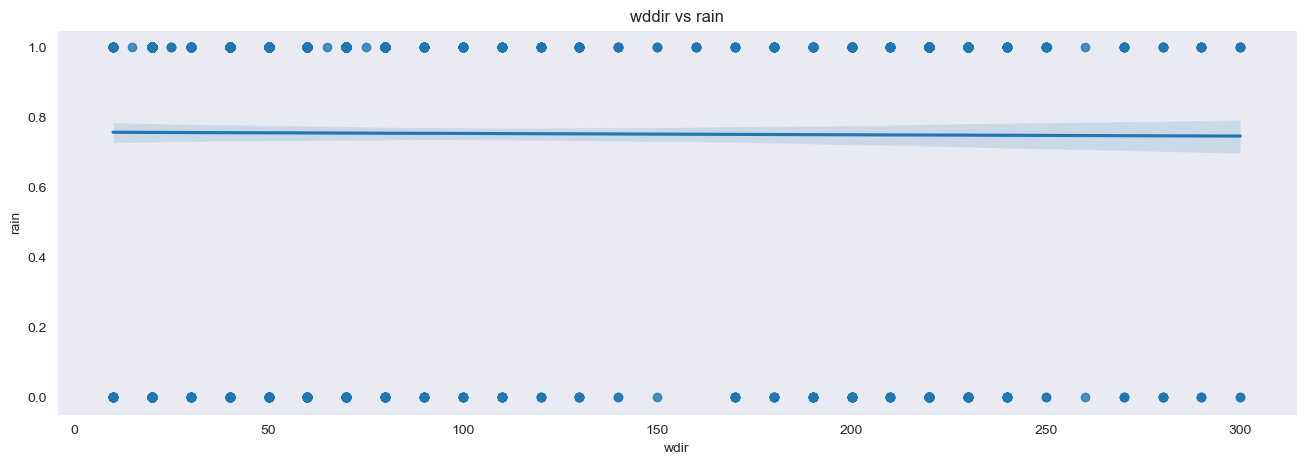

In [29]:
plt.figure(figsize=(16,5))
sns.regplot(x='winddirection',y='rainfall',data=train)
sns.set_style('dark')
plt.title('wddir vs rain')
plt.xlabel('wdir')
plt.ylabel('rain')

In [30]:
train.columns

Index(['day', 'pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity', 'cloud', 'sunshine', 'winddirection', 'windspeed',
       'rainfall', 'Temp_var', 'DPdepression', 'moisture_retention',
       'NormCloudCover', 'NormWindSpeed', 'CloudPersistenceIndex',
       'NormSunlight', 'EffectiveSunlight'],
      dtype='object')

In [31]:
train.drop(columns = ['NormCloudCover','NormWindSpeed','NormSunlight'],inplace = True)
test.drop(columns = ['NormCloudCover','NormWindSpeed','NormSunlight'],inplace = True)

In [32]:
train.columns

Index(['day', 'pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity', 'cloud', 'sunshine', 'winddirection', 'windspeed',
       'rainfall', 'Temp_var', 'DPdepression', 'moisture_retention',
       'CloudPersistenceIndex', 'EffectiveSunlight'],
      dtype='object')

In [33]:
train['day'].nunique()

365

In [34]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(train.drop(columns = 'rainfall'), train['rainfall'])

feature_importances = pd.Series(model.feature_importances_, index=train.drop(columns = 'rainfall').columns)
print(feature_importances.sort_values(ascending=False))


cloud                    0.187809
EffectiveSunlight        0.176117
sunshine                 0.084900
moisture_retention       0.076037
CloudPersistenceIndex    0.054132
humidity                 0.052301
DPdepression             0.044236
day                      0.042204
maxtemp                  0.039914
windspeed                0.038648
dewpoint                 0.038453
pressure                 0.037485
mintemp                  0.034331
Temp_var                 0.033478
temparature              0.033376
winddirection            0.026579
dtype: float64


In [35]:
X= train.drop(columns = 'rainfall')
y= train['rainfall']

In [36]:
for df in [train, test]:
    df.drop(columns = ['day','maxtemp','mintemp'])

In [37]:
X= train.drop(columns = 'rainfall')
y= train['rainfall']

In [38]:
from xgboost import XGBClassifier
from sklearn.model_selection import TimeSeriesSplit
from skopt import BayesSearchCV
from skopt.space import Real, Integer
import numpy as np

# Define TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)

# Define XGBoost model
xgb = XGBClassifier(eval_metric='auc', random_state=42)

# Define hyperparameter search space
param_space = {
    "learning_rate": Real(0.01, 0.3, prior='log-uniform'),
    "n_estimators": Integer(50, 300),
    "max_depth": Integer(2, 10),
    "gamma": Real(0, 10),
    "colsample_bytree": Real(0.3, 1.0),
    "subsample": Real(0.3, 1.0),
    "reg_alpha": Real(0, 20),
    "reg_lambda": Real(0, 20),
    "scale_pos_weight": Real(0.5, 2.0)  # Adjust for class imbalance
}

# Perform Bayesian Optimization
bayes_search = BayesSearchCV(
    xgb,
    param_space,
    n_iter=30,  # Number of search iterations (adjustable)
    cv=tscv,
    scoring='roc_auc',
    n_jobs=-1,
    random_state=42
)

bayes_search.fit(X, y)

print("Best Hyperparameters:", bayes_search.best_params_)
print("Best AUC-ROC Score:", bayes_search.best_score_)


Best Hyperparameters: OrderedDict({'colsample_bytree': 0.6803652025326403, 'gamma': 10.0, 'learning_rate': 0.06838436679645948, 'max_depth': 8, 'n_estimators': 300, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'scale_pos_weight': 0.506756054086155, 'subsample': 0.6345932054965945})
Best AUC-ROC Score: 0.8934159570185652


In [41]:
from xgboost import XGBClassifier
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import roc_auc_score
import numpy as np

# Define TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)

# Define XGBoost model with adjusted depth
xgb = XGBClassifier(
    colsample_bytree=0.6804,
    gamma=10.0,
    learning_rate=0.0684,
    max_depth=3,  # Reduced depth
    n_estimators=300,
    reg_alpha=0.0,
    reg_lambda=0.0,
    scale_pos_weight=0.5068,
    subsample=0.6346,
    eval_metric='auc',
    random_state=42
)

train_auc_scores = []
val_auc_scores = []

for train_idx, val_idx in tscv.split(X):
    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

    # Train model
    xgb.fit(X_train, y_train)

    train_pred = xgb.predict_proba(X_train)[:, 1]
    val_pred = xgb.predict_proba(X_val)[:, 1]

    train_auc = roc_auc_score(y_train, train_pred)
    val_auc = roc_auc_score(y_val, val_pred)

    train_auc_scores.append(train_auc)
    val_auc_scores.append(val_auc)

    print(f"Fold {len(train_auc_scores)}: Train AUC = {train_auc:.4f}, Validation AUC = {val_auc:.4f}")

print(f"\nMean Train AUC: {np.mean(train_auc_scores):.4f} ± {np.std(train_auc_scores):.4f}")
print(f"Mean Validation AUC: {np.mean(val_auc_scores):.4f} ± {np.std(val_auc_scores):.4f}")


Fold 1: Train AUC = 0.8855, Validation AUC = 0.9000
Fold 2: Train AUC = 0.9040, Validation AUC = 0.9127
Fold 3: Train AUC = 0.9104, Validation AUC = 0.8985
Fold 4: Train AUC = 0.9132, Validation AUC = 0.8718
Fold 5: Train AUC = 0.9106, Validation AUC = 0.8763

Mean Train AUC: 0.9047 ± 0.0101
Mean Validation AUC: 0.8919 ± 0.0154
